
## <font color='grey'>Clientes que acessaram a nova landing page tem maior conversão de vendas ?</font>

### Visão Geral

O teste A/B é uma metodologia utilizada para comparar duas versões de uma variável, como um produto ou uma campanha de marketing, com o objetivo de identificar qual delas apresenta melhor desempenho. Essa técnica é fundamental na Ciência de Dados e é amplamente empregada por organizações para tomada de decisões, permitindo otimizar produtos e campanhas de marketing de forma a maximizar o resultado financeiro da organização.


![](https://miro.medium.com/v2/resize:fit:720/format:webp/1*k5Go3CuJfGI3j2bERwN0xA.png)

###  O Que São Testes A/B?

Trata-se de um método estatístico de comparação de duas versões de um produto ou serviço (A e B) para determinar qual é mais eficaz na análise.
É comumente utilizado em marketin e desenvolvimento de novos produtos, interface de uma aplicativo móvel, uma landing page para atingimento de uma
meta específica, tais como taxa de conversão, maximizar a receita, volume de vendas, etc.
Essas duas versões são atribuídas de forma aleatória aos diferentes usuários. Os resultados do teste são comparados para concluir qual a versão  é mais eficaz para atingir o resultado desejado.


![](https://neilpatel.com/wp-content/uploads/2016/08/diferenca-entre-controle-e-variacao-no-teste-a-b.png)

## Teste de Hipóteses: 

Clientes que acessam a nova Landing Page tem uma maior conversão de vendas Produtos?

Grupo Controle: Receberão a variante de email do tipo A.

Grupo Tratamento: Receberão a variante de email do tipo B.

Na presente análise, selecionaremos 15000 clientes - 7500 para cada um dos grupos controle e tratamento. A amostragem aleatória nos ajuda a elimninar vieses causados em decorrência do estudo.

Formular a hipótese é essencial pois nos auxilia na interpretação dos resultados obtidos.

Dessa forma, definiremos as seguintes hipóteses:

- H0 (hipótese nula): PB - PA = 0
- H1 (hipótese alternativa): PB - PA > 0

H0 nos diz que a diferença de probabilidade dos dois grupos é igual a zero.

H1 nos diz que a diferença de probabilidade dos dois grupos é maior do que zero.

In [52]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python usada nessa análise:', python_version())

Versão da Linguagem Python usada nessa análise: 3.11.5


## Carregando os pacotes e o conjunto de dados

Fonte : https://www.kaggle.com/datasets/zhangluyuan/ab-testing?resource=download

In [31]:
# Imports
import datetime
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
import seaborn as sns
import scipy.stats as stats
import warnings
from statsmodels.stats.proportion import proportions_ztest, proportion_confint
import scipy.stats as scs
warnings.filterwarnings('ignore')


In [32]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark --iversions

seaborn    : 0.13.2
matplotlib : 3.9.1
numpy      : 1.24.4
pandas     : 2.1.4
statsmodels: 0.14.2
scipy      : 1.13.1



In [33]:
# Carregando os dados

df = pd.read_csv('ab_data.csv')
df.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


##### O conjuntos de dados é composto por:



1. User_id : Contém os ID's dos usuários ;

2. Timestamp: Data e hora de acesso à landing page ;

3. Group: Informações relativos ao grupo controle ou tratamento ;

4. Landing_page: Informações relativas a landing page nova ou antiga ;

5. Converted: Informa se houve conversão (1) ou senão não conversão (0) .



In [34]:
# Total de usuários com multiplas sessoes

cnt_sessao = df['user_id'].value_counts(ascending = False)
cnt_sessao.info()

<class 'pandas.core.series.Series'>
Index: 290584 entries, 805339 to 715931
Series name: count
Non-Null Count   Dtype
--------------   -----
290584 non-null  int64
dtypes: int64(1)
memory usage: 4.4 MB


In [35]:
df.dtypes

user_id          int64
timestamp       object
group           object
landing_page    object
converted        int64
dtype: object

In [36]:
# Data máxima

df['timestamp'].max()

'2017-01-24 13:41:54.460509'

In [37]:
# Data mínima

df['timestamp'].min()

'2017-01-02 13:42:05.378582'

In [38]:
# Checando valores nulos

df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [39]:
# Excluir usuários

excluir_usuarios = cnt_sessao[cnt_sessao > 1].index
df = df[~df['user_id'].isin(excluir_usuarios)]

In [40]:
# Proporção das variantes mostradas aos usuários

df.group.value_counts()

group
treatment    143397
control      143293
Name: count, dtype: int64

In [41]:
# Proporção de resultado de conversao

df.converted.value_counts()

converted
0    252445
1     34245
Name: count, dtype: int64

In [42]:
# Definição das amostras aleatórias no conjunto de dados para os dois grupos

amostra_control = df[df['group'] =='control'].sample( n = 7500, random_state = 32)
amostra_treatment = df[df['group'] == 'treatment'].sample( n = 7500 , random_state = 32)
teste_ab = pd.concat([amostra_control,amostra_treatment], axis = 0)
teste_ab.reset_index()

,index,user_id,timestamp,group,landing_page,converted
0,13255,647219,2017-01-16 11:32:09.922735,control,old_page,0
1,3503,677928,2017-01-15 20:54:56.411448,control,old_page,0
2,123237,836230,2017-01-04 23:24:46.298369,control,old_page,0
3,29129,725987,2017-01-03 17:55:49.923067,control,old_page,0
4,98235,856603,2017-01-24 06:58:19.640487,control,old_page,0
...,...,...,...,...,...,...
14995,135348,658054,2017-01-11 20:37:55.923452,treatment,new_page,0
14996,168534,655820,2017-01-06 17:36:04.560614,treatment,new_page,0
14997,287422,872367,2017-01-14 16:33:42.292097,treatment,new_page,0
14998,74765,637700,2017-01-06 17:00:31.947401,treatment,new_page,0


In [43]:
#  Calcular o desvio padrao amostral (std_dev) e  o erro padrao da media (std_ error)


# Funções lambda para desvio padrão e erro padrão
std_dev = lambda x: np.std(x, ddof=1)
std_error = lambda x: stats.sem(x, ddof=1)

# Calculando o total amostral
total_amostral = teste_ab.groupby('group').count()

# Agrupamento e cálculo das métricas
taxa_conversao = teste_ab.groupby('group')['converted'].agg([np.mean, std_dev, std_error, np.sum])

# Renomeando as colunas com quatro nomes (já que há quatro colunas)
taxa_conversao.columns = ['taxa_conversao', 'desvio_padrao', 'erro_padrao', 'total']

# Adicionando a coluna 'total_amostra' do DataFrame 'total_amostral'
taxa_conversao['total_amostral'] = total_amostral['user_id']

# Exibindo o resultado
taxa_conversao


,taxa_conversao,desvio_padrao,erro_padrao,total,total_amostral
group,,,,,
control,0.1228,0.328229,0.003790,921,7500
treatment,0.1184,0.323103,0.003731,888,7500


In [44]:
# Obtemos os valores da variante A

conversao_A = taxa_conversao['total'][0]
total_A = taxa_conversao['total_amostral'][0]
taxa_A = taxa_conversao['taxa_conversao'][0]

In [45]:
# Imprime os valores de A

print(conversao_A)
print(total_A)
print(taxa_A)

921
7500
0.1228


In [46]:
# Obtemos os valores da variante B

conversao_B = taxa_conversao['total'][1]
total_B = taxa_conversao['total_amostral'][1]
taxa_B = taxa_conversao['taxa_conversao'][1]

In [47]:
# Imprime os valores de B

print(conversao_B)
print(total_B)
print(taxa_B)

888
7500
0.1184


## Plot da Distribuição

Criamos o Plot da distribuição da diferença entre as duas amostras e comparamos os resultados.

Podemos comparar os dois grupos traçando a distribuição do grupo de controle e calculando a probabilidade de obter o resultado de nosso grupo de teste.

Text(0, 0.5, 'Probabilidade')

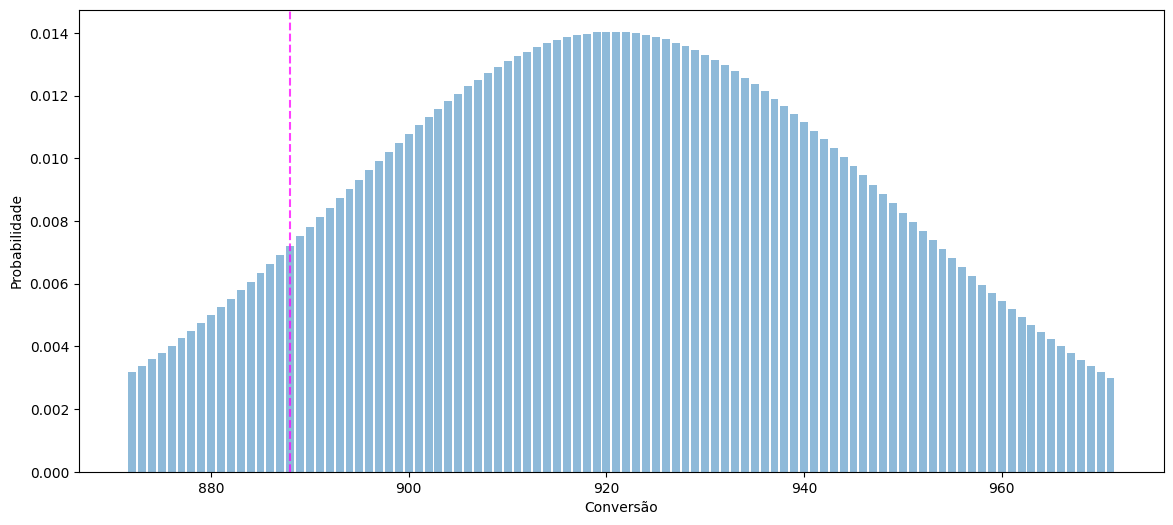

In [48]:
# Plot da distribuição do grupo A (controle)

# Área de plotagem
fig, ax = plt.subplots(figsize = (14,6))

# Teste de A
x = np.linspace(conversao_A - 49, conversao_A + 50, 100)
y = scs.binom(total_A, taxa_A).pmf(x)

# Cria a barra vertical
ax.bar(x, y, alpha = 0.5)
ax.axvline(x = taxa_B * total_A, c = 'magenta', alpha = 0.75, linestyle = '--')

# Labels
plt.xlabel('Conversão')
plt.ylabel('Probabilidade')

Text(0, 0.5, 'Probabilidade')

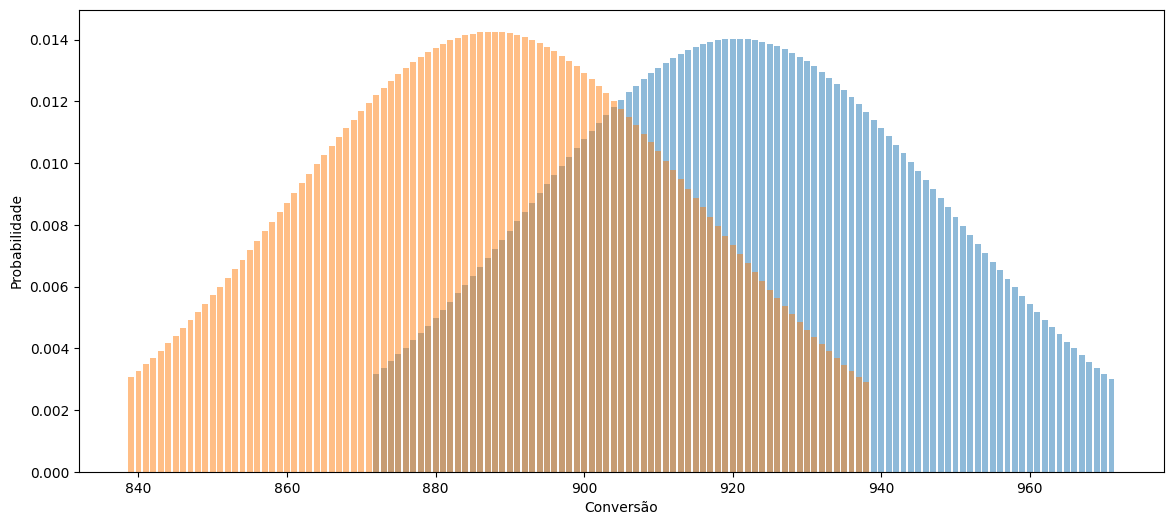

In [49]:
# Plot da distribuição dos 2 grupos

# Área de plotagem 
fig, ax = plt.subplots(figsize = (14,6))

# Gráfico de A
xA = np.linspace(conversao_A - 49, conversao_A + 50, 100)
yA = scs.binom(total_A, taxa_A).pmf(xA)
ax.bar(xA, yA, alpha = 0.5)

# Gráfico de B
xB = np.linspace(conversao_B - 49, conversao_B + 50, 100)
yB = scs.binom(total_B, taxa_B).pmf(xB)
ax.bar(xB, yB, alpha = 0.5)

# Labels
plt.xlabel('Conversão')
plt.ylabel('Probabilidade')

Em relação a plotagem das duas distribuições analisadas:

Como as distribuições têm seus picos em diferentes intervalos (920 para A e 800 para B), o teste A/B pode sugerir que A performa melhor que B em termos de conversão. Dado que o objetivo do estudo é compreender o grau de conversão das diferentes versões de landing page, grupo A parece ter uma média de conversão maior.

Ambas as distribuições mostram alguma variabilidade. Isso implica que, mesmo que o grupo A tenha uma conversão média maior, há alguns usuários no grupo B que tiveram conversões semelhantes aos do grupo A, conforme indicado pela sobreposição demonstrado acima.

Os testes estatísticos abaixo irão nos auxiliar para decisão de negócio.

In [50]:
control_results = teste_ab[teste_ab['group'] == 'control']['converted']
treatment_results = teste_ab[teste_ab['group'] == 'treatment']['converted']

num_control = control_results.count()
num_treatment = treatment_results.count()
successes = [control_results.sum(), treatment_results.sum()]
n_obs = [num_control, num_treatment]

zstat, pval = proportions_ztest ( count = successes, nobs= n_obs)

(lower_ctl, lower_treat),(upper_ctl, upper_treat) = proportion_confint(count = successes, nobs= n_obs, alpha= 0.05)

print ( 'RESULTADOS DA ANÁLISE: ')
print(f'Z Statistic: {zstat:.2f}')
print (f'P - Value : {pval:.2f}')
print (f'CI Control Group : [{lower_ctl:.3f},{upper_ctl:.3f}]')
print (f'CI Treatment Group :[{lower_treat:.3f}, {upper_treat:.3f}]')

RESULTADOS DA ANÁLISE: 
Z Statistic: 0.83
P - Value : 0.41
CI Control Group : [0.115,0.130]
CI Treatment Group :[0.111, 0.126]


### Conclusão:

Como podemos observar o valor-p foi de 0,41 para o presente teste A/B. Considerando um nível de significância de 0,05
não temos evidências para rejeitar a hipótese nula.
Isso quer dizer que tais resultados ocorreram devido ao acaso, e dessa forma, não são estatisticamente significativos par afirmamos que a landing page do grupo de tratamento tem uma maior conversão.



# Fim